# Exponential random variable

Exponential random variable (RV) is similar to Poisson, but it's a continuous RV.

Exponential RV models the time until the next event and is defined as:
$$X \sim Exp(\lambda)$$


$$
f(X=x) = \begin{cases} 
\lambda e^{-\lambda x} & \text{if } x \geq 0 \\
0 & \text{if } x < 0 
\end{cases}
$$


**Big Note**: unlike PMF (for discrete RVs), this function only return the rate of changes at `X=x`. Therefore you need to integrate PDFs to get a probability. 

$$
\int_{x=a}^{b} f(X=x) dx
$$

Remember not to use above function for situations where `a=b`, since it results in zero probability (division by infinity)

Either you can integrate this function or use comulative density function (CDF) to calculate the probability.

The **CDF** for exponential RVs is defined as:
$$F(x) = 1 - e^{-\lambda x}$$

**______________________________________________________________________________________________________________________________**

**Question:**

Suppose you are having a giant pizza with your friend and you love pizza. Imagine you one of your friends eats an average of 3.5 chunks every 5 minutes. Now, What is the probability he/she has his/her next piece in the next 2 minutes?

**Answer**

Let X be the time until having the next piece of pizza

lambda = 3.5/5

so:
$$P(0<X<=2) = P(0<X<2) = ?$$

In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Solution using integral

In [2]:
def exponentialPdf(x:float, lambd:float):
    """
    exponential PDF
    
    
    paramters
    ----------
    lambd:float
    rate
    
    x:float
    time until next success
    
    
    return
    ---------
    f_x:float
    PDF value of the next success in the specified interval
    
    """
    
    return lambd*np.exp(-lambd*x)

In [4]:
lambd = 3.5/ 5
x = 2

# integral
probability, error = quad(exponentialPdf, 0, x, args=(lambd,))
print(f"The probability is approximately: {probability}")

The probability is approximately: 0.7534030360583934


### Solution using CDF

In [9]:
def exponentialCdf(x:float, lambd:float):
    """
    exponential CDF
    
    
    paramters
    ----------
    lambd:float
    rate
    
    x:float
    time until next success
    
    
    return
    ---------
    prob:float
    probability of next success in the specified interval
    
    """
    
    return 1-np.exp(-lambd*x)

In [10]:
print(f"The probability is approximately: {exponentialCdf(x, lambd)}")

The probability is approximately: 0.7534030360583935


### CDF vs PDF plot

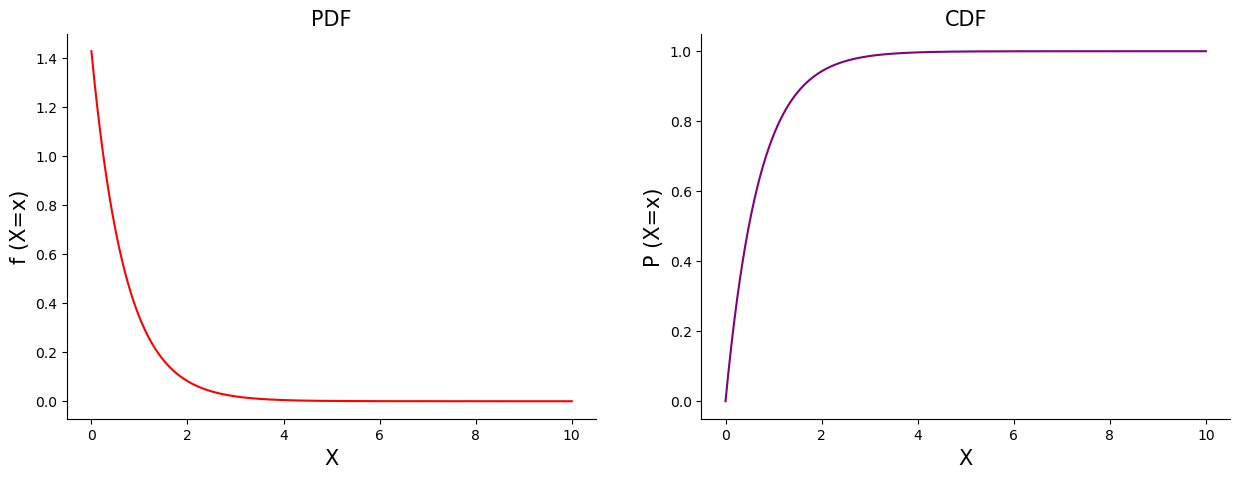

In [25]:
# Generate x values
x_values = np.linspace(0, 10, 1000)

pdfVal = exponentialPdf(x_values, lambd)
cdfVal = exponentialCdf(x_values, lambd)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(x_values, pdfVal, color="red")
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].set_title("PDF", fontsize=15)
ax[0].set_ylabel("f (X=x)", fontsize=15)
ax[0].set_xlabel("X", fontsize=15)

ax[1].plot(x_values, cdfVal, color="purple")
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].set_title("CDF", fontsize=15)
ax[1].set_ylabel("P (X=x)", fontsize=15)
ax[1].set_xlabel("X", fontsize=15)

plt.show()